<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [3]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os 
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [4]:
os.listdir()

['.config',
 'sales.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'groceries.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'ecommerce-data.csv',
 'sample_data']

In [11]:
df = pd.read_csv('bz_data_analyis.csv')
df.quantity_ordered = [1 if re.findall('[A-Z]',str(a)) else int(a) for a in df.quantity_ordered]
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,12/30/19 00:01,0,1,1
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,12/29/19 07:03,7,3,1
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,12/12/19 18:21,18,21,1
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,12/22/19 15:13,15,13,1
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,12/18/19 12:38,12,38,1


In [13]:
df[['order_date']].assign(len = [len(a) for a in df['order_date']]) 

,order_date,len
0,12/30/19 00:01,14
1,12/29/19 07:03,14
2,12/12/19 18:21,14
3,12/22/19 15:13,14
4,12/18/19 12:38,14
...,...,...
185945,6/7/19 19:02,12
185946,6/1/19 19:29,12
185947,06/22/19 18:57,14
185948,06/26/19 18:35,14


In [16]:
df['order_date'] = pd.to_datetime(df['order_date'], format = '%m/%d/%y %H:%M')
df['date'] = df['order_date'].to_numpy().astype('datetime64[D]')
df['weekday'] = df['order_date'].dt.weekday
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,0
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,6
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,3
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,6
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2


In [17]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,mon
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,sun
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,thu
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,sun
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,wed


In [30]:
list_product = df['product'].value_counts().reset_index().rename(columns = {'index':'product','product':'cnt'})
list_product['type'] = ['cable', 'cable', 'battery', 'battery', 'headphone', 'headphone', 'headphone','monitor', 'mobile',
                        'monitor', 'monitor', 'mobile', 'tv', 'laptop', 'laptop', 'monitor','mobile', 'white', 'white'
                        ]
list_product = dict(zip(list_product['product'], list_product['type']))
df['type'] = df['product'].apply(lambda x : list_product.get(x,x))
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday,type
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,mon,laptop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,sun,white
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,thu,cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,sun,monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,wed,cable


In [31]:
cnt = df.groupby(['weekday', 'code', 'hour', 'type'])['quantity_ordered'].sum().reset_index().rename(columns = {'quantity_ordered':'cnt'})
cnt.head()

,weekday,code,hour,type,cnt
0,fri,CA,0,battery,75
1,fri,CA,0,cable,48
2,fri,CA,0,headphone,60
3,fri,CA,0,laptop,12
4,fri,CA,0,mobile,15


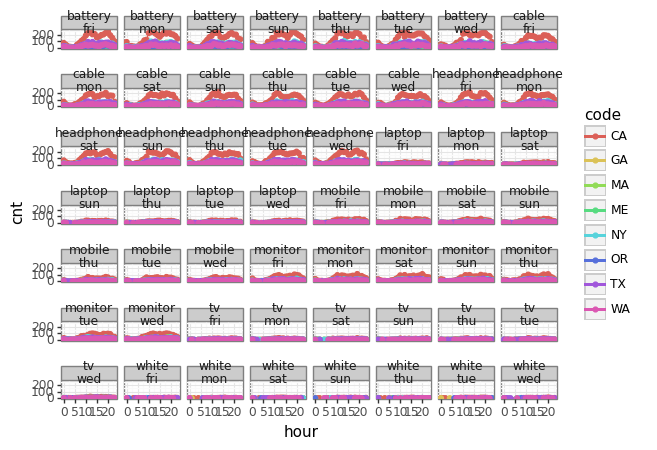

<ggplot: (8756295051993)>

In [36]:
(
    ggplot(cnt, aes('hour', 'cnt', color = 'code')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.facet_wrap('~type+weekday') +
    gg.theme_bw()
)

# Iterators

In [58]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [59]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}